# Práctica 0

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

In [46]:
# Distancia de la imagen como función de la distancia del objeto, tomando como parámetro la distancia focal
def si(so, f):
    return 1 / (1/f - 1/so)

# Calculo del R2
def R2(so_datos, si_datos, f):
    si_ajuste = si(so_datos, f)
    RSS = np.sum((si_datos - si_ajuste)**2)
    TSS = np.sum((si_datos - np.mean(si_datos))**2)
    return 1 - RSS / TSS

# Distancias del primer experimento
so1 = np.array([37.0, 34.0, 31.0, 27.5, 26.0, 24.0, 22.0, 20.5, 19.5, 19.0, 18.5, 18.0])
si1 = np.array([23.9, 25.2, 26.9, 20.6, 32.7, 26.4, 42.0, 48.7, 55.3, 61.2, 66.8, 73.6])

# Distancias del segundo experimento
so2 = np.array([30.0]*12)
si2 = np.array([27.8, 27.6, 27.9, 28.1, 27.9, 28.0, 28.1, 28.4, 27.6, 27.7, 27.8, 28.1])

# Incertidumbre absoluta de las medidas
ds = 0.1

In [72]:
# Incertidumbre relativa de la primer medida del Experimento 1
e_rel = (ds / si1[0]) * 100
print(e_rel)

0.4184100418410042


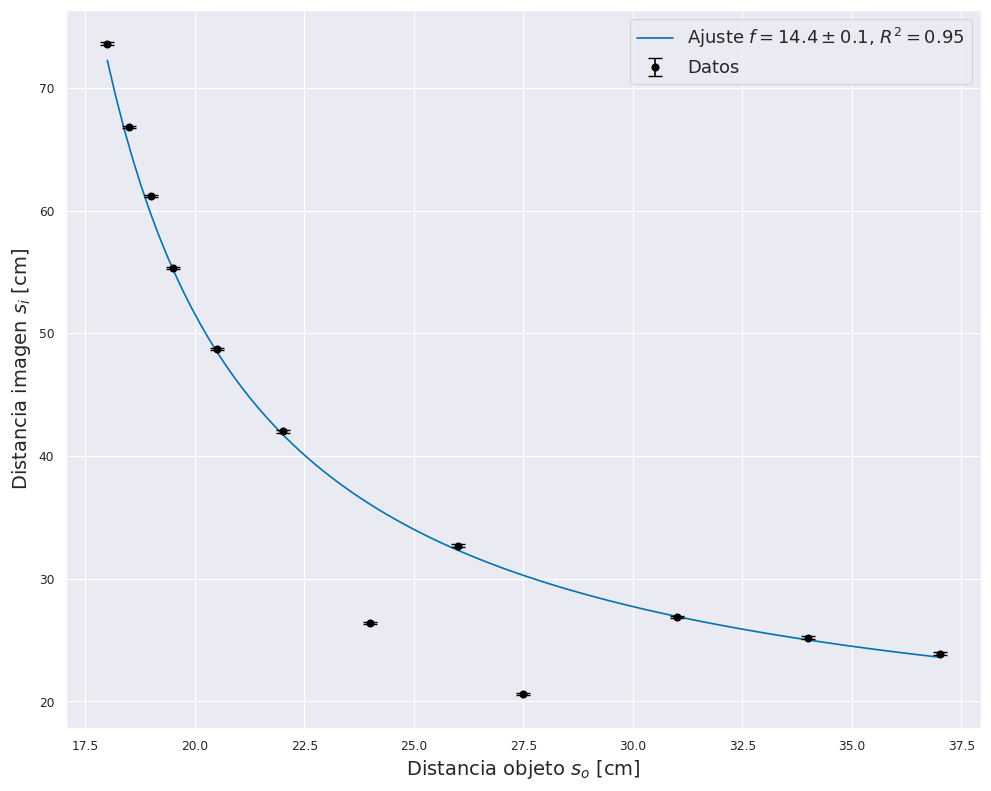

In [78]:
# Realizar el ajuste de datos para el primer experimento
f, df = curve_fit(si, so1, si1)
f = f[0]; df = np.sqrt(df[0][0])

# Calculo del R2
r2 = R2(so1, si1, f)

# Graficación
fig, ax = plt.subplots(figsize= (10, 8))
so = np.linspace(so1[0], so1[-1], 100)
ax.plot(so, si(so, f), label=rf"Ajuste $f = {f:.1f} \pm {df:.1f}$, $R^2 = {r2:.2f}$")
ax.errorbar(so1, si1, yerr = [ds]*12, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"Distancia objeto $s_o$ [cm]", fontsize= 14)
ax.set_ylabel(r"Distancia imagen $s_i$ [cm]", fontsize= 14)
ax.grid(True)
ax.legend(fontsize= 13)
plt.tight_layout()
fig.savefig("Ajuste_exp1.pdf")
plt.show()

In [77]:
# Calculo de incertidumbres relativas del primer experimento
dsi1_rel = (ds / si1) * 100

for i in range(len(dsi1_rel)):
    print(f"#{i+1} : {dsi1_rel[i]:.2f}")

print(f"La medida de menor incertidumbre relativa en si es: #{np.argmin(dsi1_rel) + 1}")
print(f"La medida de mayor incertidumbre relativa en si es: #{np.argmax(dsi1_rel) + 1}")


#1 : 0.42
#2 : 0.40
#3 : 0.37
#4 : 0.49
#5 : 0.31
#6 : 0.38
#7 : 0.24
#8 : 0.21
#9 : 0.18
#10 : 0.16
#11 : 0.15
#12 : 0.14
La medida de menor incertidumbre relativa en si es: #12
La medida de mayor incertidumbre relativa en si es: #4


In [69]:
#
si2_med = np.mean(si2)
dsi2 = np.std(si2)

